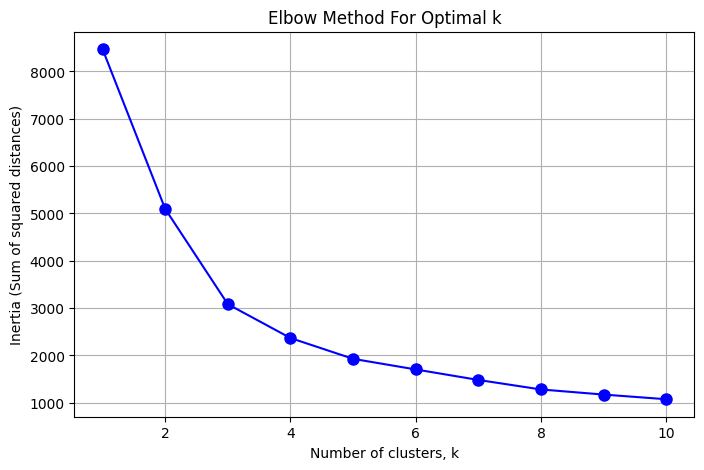

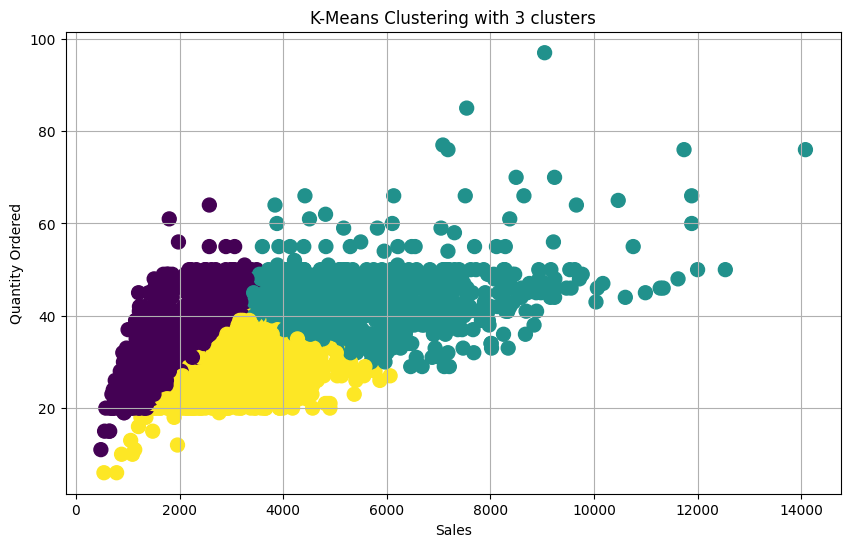

Cluster Centers:
 [[-0.83846133  0.00340709 -1.31519107]
 [ 1.10107381  0.89846585  0.64278204]
 [-0.2525054  -0.79188456  0.55612886]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')  # or 'windows-1252'

data_clean = data[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].dropna()

# Step 3: Scale the data to normalize the features (K-Means works better with scaled data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Step 4: Apply K-Means Clustering and Determine Optimal Clusters using Elbow Method
inertia = []
K = range(1, 11)  # Test for k values from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)  # Inertia is the sum of squared distances of samples to their closest cluster center

# Step 5: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Step 6: Fit the final model with the optimal number of clusters (based on the elbow curve)
# Let's assume from the elbow method, the optimal k is 3

print("\n")

optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(data_scaled)

# Step 7: Add cluster labels to the original dataset
data_clean['Cluster'] = clusters

# Step 8: Visualize the clusters (for 2D features, if possible)
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['SALES'], data_clean['QUANTITYORDERED'], c=clusters, cmap='viridis', s=100)
plt.title(f'K-Means Clustering with {optimal_k} clusters')
plt.xlabel('Sales')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.show()

# Step 9: Check the cluster centers
print("Cluster Centers:\n", kmeans_final.cluster_centers_)
